<a href="https://colab.research.google.com/github/Christoputhanpurackal/machine-learning/blob/main/autismprediction_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix

In [ ]:
data=pd.read_csv('/content/train (1).csv')
data.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [ ]:
data.shape

(800, 22)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               200 non-null    int64  
 1   A1_Score         200 non-null    int64  
 2   A2_Score         200 non-null    int64  
 3   A3_Score         200 non-null    int64  
 4   A4_Score         200 non-null    int64  
 5   A5_Score         200 non-null    int64  
 6   A6_Score         200 non-null    int64  
 7   A7_Score         200 non-null    int64  
 8   A8_Score         200 non-null    int64  
 9   A9_Score         200 non-null    int64  
 10  A10_Score        200 non-null    int64  
 11  age              200 non-null    float64
 12  gender           200 non-null    object 
 13  ethnicity        200 non-null    object 
 14  jaundice         200 non-null    object 
 15  austim           200 non-null    object 
 16  contry_of_res    200 non-null    object 
 17  used_app_before 

In [ ]:
data.describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.575000,0.555000,0.475000,0.425000,0.450000,0.340000,0.420000,0.54500,0.540000,0.640000,26.074568,8.671369
std,57.879185,0.495584,0.498213,0.500628,0.495584,0.498742,0.474898,0.494797,0.49922,0.499648,0.481205,14.517024,4.709994
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,4.781474,-5.655613
25%,50.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,16.152524,5.611695
50%,100.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,1.000000,22.717970,9.804165
75%,150.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,32.004413,12.487160
max,200.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,77.110749,15.731361


In [ ]:
data['ethnicity'].value_counts()

,count
ethnicity,
White-European,66
?,54
Middle Eastern,27
Asian,17
South Asian,9
Pasifika,8
Others,7
Latino,4
Turkish,3


In [ ]:
data['relation'].value_counts()

,count
relation,
Self,180
Parent,8
?,6
Relative,2
Others,2
Health care professional,2


In [ ]:
data.isnull().sum()

,0
ID,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0


In [ ]:

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['ethnicity']=le.fit_transform(data['ethnicity'])
data['relation']=le.fit_transform(data['relation'])
data['gender']=le.fit_transform(data['gender'])
data['jaundice']=le.fit_transform(data['jaundice'])
data['austim']=le.fit_transform(data['austim'])
data['contry_of_res']=le.fit_transform(data['contry_of_res'])
data['used_app_before']=le.fit_transform(data['used_app_before'])
data['age_desc']=le.fit_transform(data['age_desc'])

In [ ]:
data.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation
0,1,1,1,0,0,1,1,0,0,1,...,15.599481,1,10,1,0,14,0,12.399055,0,5
1,2,1,0,0,0,0,0,0,1,0,...,27.181099,1,1,0,0,21,0,6.551598,0,5
2,3,1,1,1,0,1,1,0,1,1,...,31.643906,1,10,1,0,10,0,3.180663,0,5
3,4,0,0,0,0,0,0,0,0,0,...,25.369210,1,0,0,0,14,0,2.220766,0,5
4,5,0,0,0,1,0,0,0,0,0,...,9.078580,1,0,0,0,17,0,7.252028,0,5


<Axes: xlabel='result', ylabel='Count'>

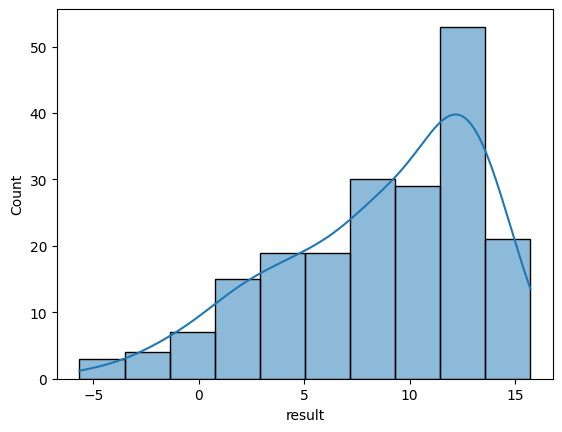

In [ ]:

sns.histplot(data['result'],kde='True')

<Axes: xlabel='age', ylabel='result'>

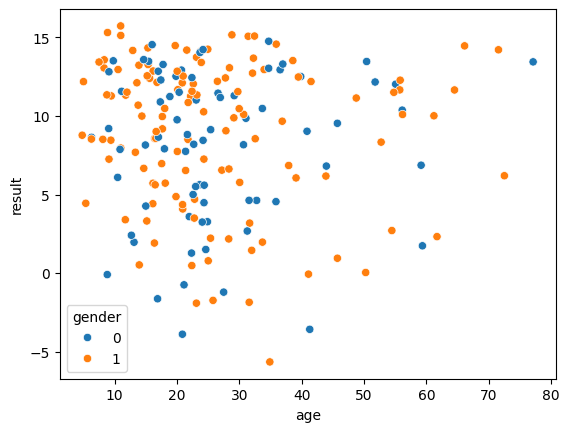

In [ ]:
sns.scatterplot(x='age',y='result',data=data,hue='gender')

<Axes: xlabel='gender', ylabel='age'>

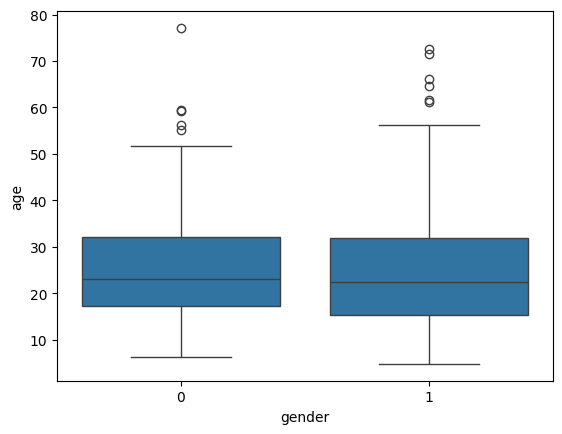

In [ ]:
sns.boxplot(x='gender',y='age',data=data)

<Axes: >

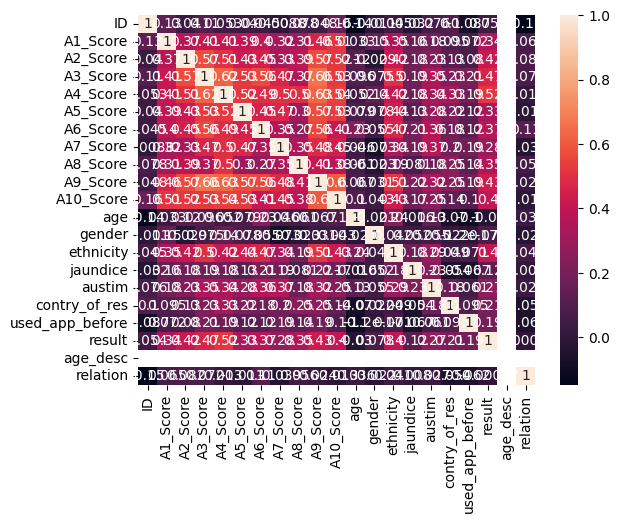

In [ ]:
sns.heatmap(data.corr(),annot=True)

outlier handling

In [ ]:
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1

In [ ]:

outliers = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))

In [ ]:

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_capped = data.clip(lower=lower_bound, upper=upper_bound, axis=1)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, 'ID'),
  Text(1, 0, 'A1_Score'),
  Text(2, 0, 'A2_Score'),
  Text(3, 0, 'A3_Score'),
  Text(4, 0, 'A4_Score'),
  Text(5, 0, 'A5_Score'),
  Text(6, 0, 'A6_Score'),
  Text(7, 0, 'A7_Score'),
  Text(8, 0, 'A8_Score'),
  Text(9, 0, 'A9_Score'),
  Text(10, 0, 'A10_Score'),
  Text(11, 0, 'age'),
  Text(12, 0, 'gender'),
  Text(13, 0, 'ethnicity'),
  Text(14, 0, 'jaundice'),
  Text(15, 0, 'austim'),
  Text(16, 0, 'contry_of_res'),
  Text(17, 0, 'used_app_before'),
  Text(18, 0, 'result'),
  Text(19, 0, 'age_desc'),
  Text(20, 0, 'relation')])

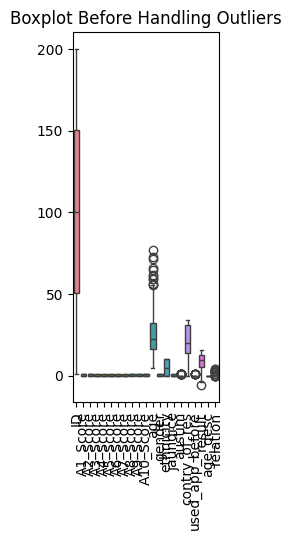

In [ ]:
plt.subplot(1, 3, 1)
sns.boxplot(data=data)
plt.title("Boxplot Before Handling Outliers")
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, 'ID'),
  Text(1, 0, 'A1_Score'),
  Text(2, 0, 'A2_Score'),
  Text(3, 0, 'A3_Score'),
  Text(4, 0, 'A4_Score'),
  Text(5, 0, 'A5_Score'),
  Text(6, 0, 'A6_Score'),
  Text(7, 0, 'A7_Score'),
  Text(8, 0, 'A8_Score'),
  Text(9, 0, 'A9_Score'),
  Text(10, 0, 'A10_Score'),
  Text(11, 0, 'age'),
  Text(12, 0, 'gender'),
  Text(13, 0, 'ethnicity'),
  Text(14, 0, 'jaundice'),
  Text(15, 0, 'austim'),
  Text(16, 0, 'contry_of_res'),
  Text(17, 0, 'used_app_before'),
  Text(18, 0, 'result'),
  Text(19, 0, 'age_desc'),
  Text(20, 0, 'relation')])

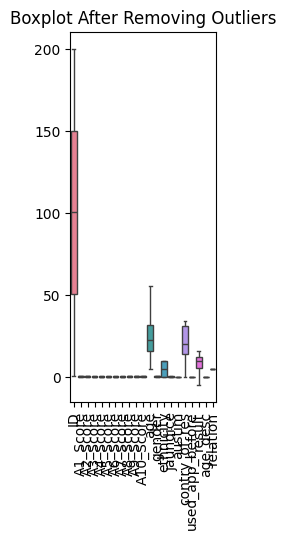

In [ ]:


plt.subplot(1, 3, 2)
sns.boxplot(data=data_capped)
plt.title("Boxplot After Removing Outliers")
plt.xticks(rotation=90)

In [ ]:
x=data.drop('austim',axis=1)
y=data['austim']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)
X_train

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,contry_of_res,used_app_before,result,age_desc,relation
134,135,1,1,1,1,1,1,1,1,1,1,24.265754,1,10,0,31,0,10.265562,0,5
66,67,1,1,1,1,1,1,1,1,1,1,26.567470,0,10,1,32,0,11.450438,0,5
26,27,1,1,1,1,1,1,1,0,1,1,13.755341,1,1,0,32,1,10.688233,0,5
113,114,1,1,1,1,1,1,0,0,1,1,23.882208,1,10,1,18,0,13.408232,0,5
168,169,1,0,0,0,0,0,0,0,0,0,22.394573,1,10,0,18,0,11.570205,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,68,0,0,0,0,0,0,0,0,0,0,16.585655,1,5,0,18,0,8.574641,0,5
192,193,1,0,0,0,0,0,0,0,0,1,34.878167,1,5,0,23,0,-5.655613,0,5
117,118,1,1,0,0,1,1,0,0,1,1,24.301239,1,10,1,1,0,7.253426,0,5
47,48,1,1,1,1,1,1,1,1,1,1,66.121446,1,10,0,32,0,14.462111,0,5


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train_scaled = sc.fit_transform(X_train)

X_test_scaled = sc.transform(X_test)

In [ ]:
X_train_scaled

array([[0.67336683, 1.        , 1.        , ..., 0.75938044, 0.        ,
        1.        ],
       [0.33165829, 1.        , 1.        , ..., 0.81589461, 0.        ,
        1.        ],
       [0.13065327, 1.        , 1.        , ..., 0.77954029, 0.        ,
        1.        ],
       ...,
       [0.5879397 , 1.        , 1.        , ..., 0.61571283, 0.        ,
        1.        ],
       [0.2361809 , 1.        , 1.        , ..., 0.95954014, 0.        ,
        1.        ],
       [0.86432161, 0.        , 1.        , ..., 0.91420431, 0.        ,
        1.        ]])

knn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
print("accuracy",accuracy_score(y_test, y_pred))
print("recall",recall_score(y_test, y_pred))
print('precision',precision_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

accuracy 0.85
recall 0.0
precision 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


array([[34,  0],
       [ 6,  0]])

In [ ]:
k_values = [i for i in range (1,20)]
scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=5)
    scores.append(np.mean(score))

In [ ]:
scores

[0.8125,
 0.85,
 0.84375,
 0.85,
 0.84375,
 0.85625,
 0.85625,
 0.85625,
 0.85625,
 0.85625,
 0.85625,
 0.85625,
 0.85625,
 0.85625,
 0.85625,
 0.85625,
 0.85625,
 0.85625,
 0.85625]

Text(0, 0.5, 'Accuracy Score')

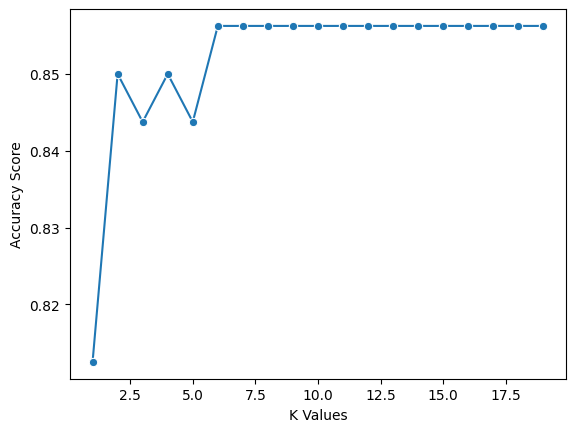

In [ ]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [ ]:
best_index = np.argmax(scores)
best_k = k_values[best_index]
best_k

6

In [ ]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [ ]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

recall = recall_score(y_test, y_pred)
print("Recall:", recall)

f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)
confusion_matrix(y_test, y_pred)

Accuracy: 0.85
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


array([[34,  0],
       [ 6,  0]])

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_linear = SVC(kernel='linear',C=100.0)
svc_linear.fit(X_train, y_train)

SVC(C=100.0, kernel='linear')

In [ ]:
y_pred_linear = svc_linear.predict(X_test)


accuracy = accuracy_score(y_test, y_pred_linear)
precision = precision_score(y_test, y_pred_linear)
recall = recall_score(y_test, y_pred_linear)
fscore = f1_score(y_test, y_pred_linear)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score: ",fscore)

Accuracy: 0.8
Precision: 0.25
Recall: 0.16666666666666666
F1 Score:  0.2


Text(0.5, 1.0, 'confusion matrix')

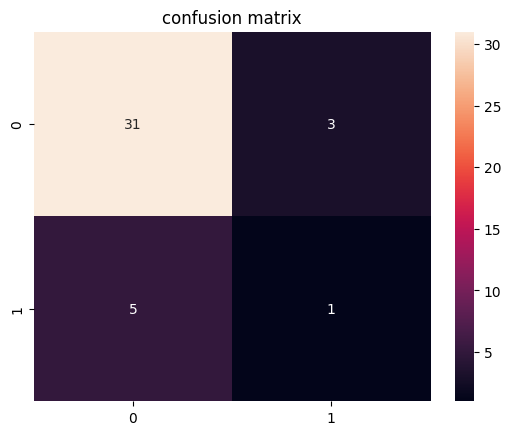

In [ ]:
cm = confusion_matrix(y_test,y_pred_linear)
sns.heatmap(cm, annot=True, fmt='d').set_title("confusion matrix")

In [ ]:
#polynomial Kernel
svc_poly = SVC(kernel='poly', degree=8)
svc_poly.fit(X_train, y_train)

SVC(degree=8, kernel='poly')

In [ ]:
y_pred_poly = svc_poly.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_poly)
precision = precision_score(y_test, y_pred_poly)
recall = recall_score(y_test, y_pred_poly)
fscore = f1_score(y_test, y_pred_poly)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score: ",fscore)

Accuracy: 0.875
Precision: 1.0
Recall: 0.16666666666666666
F1 Score:  0.2857142857142857


Text(0.5, 1.0, 'confusion matrix')

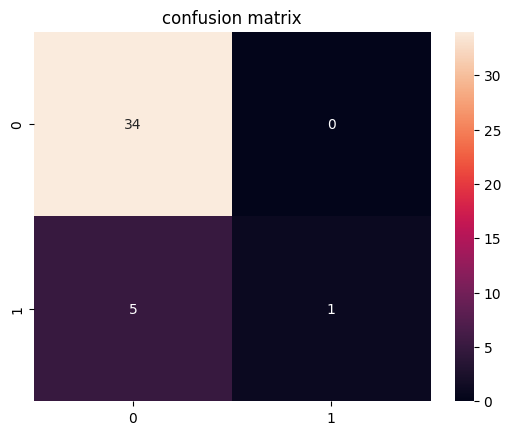

In [ ]:
cm = confusion_matrix(y_test,y_pred_poly)
sns.heatmap(cm, annot=True, fmt='d').set_title("confusion matrix")

In [ ]:
#Radial SVM or Gausian Kernel
svc_gaussian = SVC(kernel='rbf', gamma=0.1)
svc_gaussian.fit(X_train, y_train)

SVC(gamma=0.1)

In [ ]:
y_pred_gausian = svc_gaussian.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_gausian)
precision = precision_score(y_test, y_pred_gausian)
recall = recall_score(y_test, y_pred_gausian)
fscore = f1_score(y_test, y_pred_gausian)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score: ",fscore)

Accuracy: 0.85
Precision: 0.0
Recall: 0.0
F1 Score:  0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Text(0.5, 1.0, 'confusion matrix')

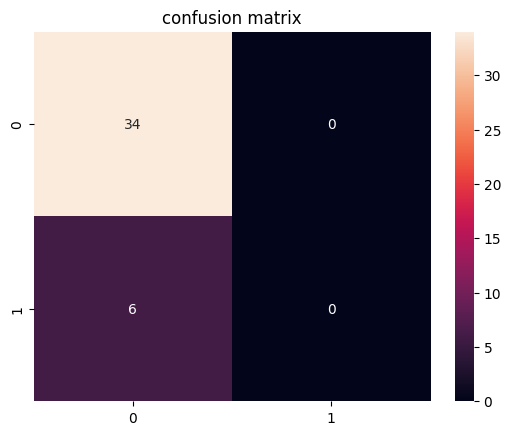

In [ ]:
cm = confusion_matrix(y_test,y_pred_gausian)
sns.heatmap(cm, annot=True, fmt='d').set_title("confusion matrix")

In [ ]:
#sigmoidal kernel
svc_sigmoid = SVC(kernel='sigmoid')
svc_sigmoid.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [ ]:
y_pred_sigmoid = svc_sigmoid.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_sigmoid)
precision = precision_score(y_test, y_pred_sigmoid)
recall = recall_score(y_test, y_pred_sigmoid)
fscore = f1_score(y_test, y_pred_sigmoid)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score: ",fscore)

Accuracy: 0.85
Precision: 0.0
Recall: 0.0
F1 Score:  0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Text(0.5, 1.0, 'confusion matrix')

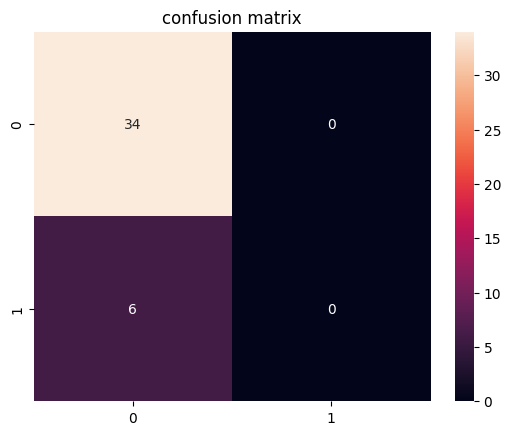

In [ ]:
cm = confusion_matrix(y_test,y_pred_sigmoid)
sns.heatmap(cm, annot=True, fmt='d').set_title("confusion matrix")

naive bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [ ]:
gaus_classifier = GaussianNB()
gaus_classifier.fit(X_train, y_train)

y_pred_gaus = gaus_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_gaus)
precision = precision_score(y_test, y_pred_gaus)
recall = recall_score(y_test, y_pred_gaus)
fscore = f1_score(y_test, y_pred_gaus)

print("Accuracy:", accuracy)
print("Precision:", precision) #quality of positive prediction made by the model
print("Recall:", recall)
print("F1 Score: ",fscore)

Accuracy: 0.75
Precision: 0.3333333333333333
Recall: 0.6666666666666666
F1 Score:  0.4444444444444444


In [ ]:
bin_classifier = BernoulliNB()
bin_classifier.fit(X_train, y_train)

y_pred_bin = bin_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_bin)
precision = precision_score(y_test, y_pred_bin)
recall = recall_score(y_test, y_pred_bin)
fscore = f1_score(y_test, y_pred_bin)

print("Accuracy:", accuracy)
print("Precision:", precision) #quality of positive prediction made by the model
print("Recall:", recall)
print("F1 Score: ",fscore)

Accuracy: 0.775
Precision: 0.38461538461538464
Recall: 0.8333333333333334
F1 Score:  0.5263157894736842


logistic regression

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (160, 20)
y_train shape: (160,)
X_test shape: (40, 20)
y_test shape: (40,)


In [ ]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()

# Fit the model on the training data
reg.fit(X_train, y_train)

train_pred = reg.predict(X_train)
test_pred = reg.predict(X_test)

# Calculate accuracy using the scikit-learn model
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(f"Logistic Regression accuracy on training data using scikit-learn: {train_accuracy}")
print(f"Logistic Regression accuracy on test data using scikit-learn: {test_accuracy }")

Logistic Regression accuracy on training data using scikit-learn: 0.875
Logistic Regression accuracy on test data using scikit-learn: 0.85



Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Decision Tree Classification
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:

accuracy_score(y_test, y_pred)

0.775

<Axes: >

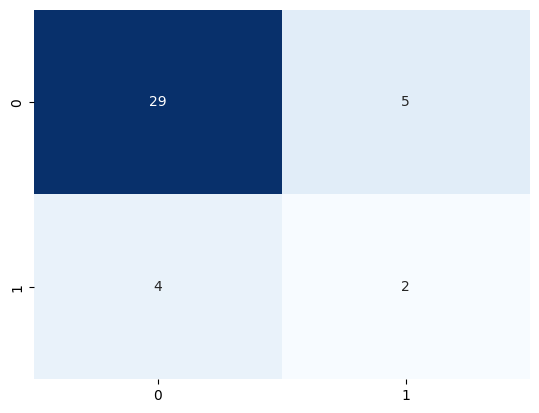

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

[Text(0.35714285714285715, 0.95, 'x[9] <= 0.5\nentropy = 0.594\nsamples = 160\nvalue = [137, 23]'),
 Text(0.14285714285714285, 0.85, 'x[17] <= -0.981\nentropy = 0.104\nsamples = 73\nvalue = [72, 1]'),
 Text(0.25, 0.8999999999999999, 'True  '),
 Text(0.09523809523809523, 0.75, 'x[17] <= -2.397\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(0.047619047619047616, 0.65, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.14285714285714285, 0.65, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.19047619047619047, 0.75, 'entropy = 0.0\nsamples = 69\nvalue = [69, 0]'),
 Text(0.5714285714285714, 0.85, 'x[17] <= 12.996\nentropy = 0.816\nsamples = 87\nvalue = [65.0, 22.0]'),
 Text(0.4642857142857143, 0.8999999999999999, '  False'),
 Text(0.2857142857142857, 0.75, 'x[7] <= 0.5\nentropy = 0.604\nsamples = 61\nvalue = [52, 9]'),
 Text(0.23809523809523808, 0.65, 'entropy = 0.0\nsamples = 26\nvalue = [26, 0]'),
 Text(0.3333333333333333, 0.65, 'x[0] <= 94.0\nentropy = 0.822\nsamples =

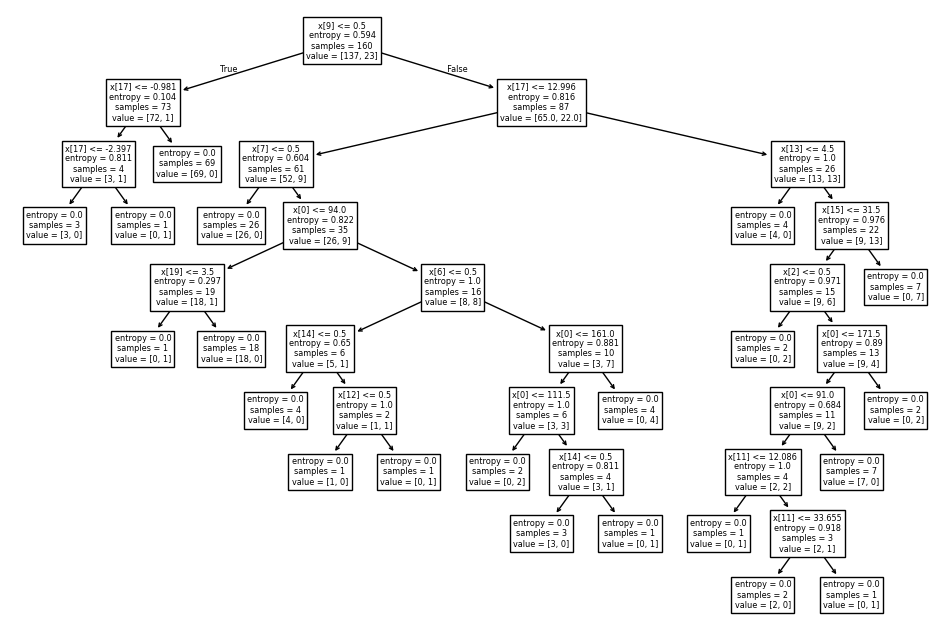

In [ ]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(classifier.fit(X_train, y_train))

random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.85

<Axes: >

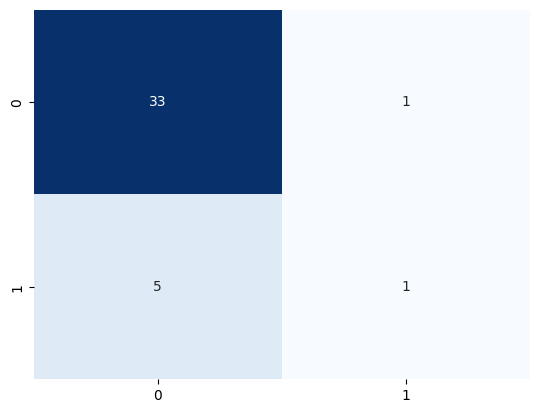

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

pca

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

In [ ]:
X_pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
X_pca_df['Target'] = y

In [ ]:
X_pca_df.head()

,PC1,PC2,Target
0,1.643275,0.225256,0
1,1.731810,-0.544948,0
2,1.228227,0.346350,0
3,1.213737,0.835648,0
4,-1.135768,0.686156,0


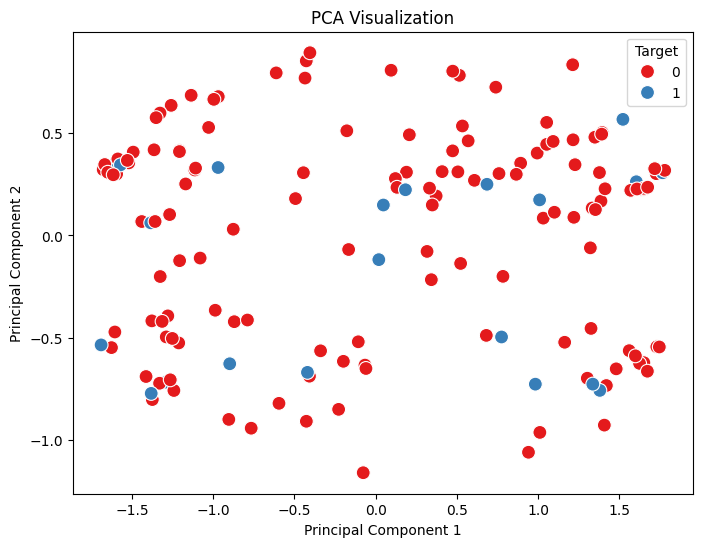

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=X_pca_df, x='PC1', y='PC2', hue='Target', palette='Set1', s=100, marker='o')
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
pca = PCA()
pca.fit(x)

PCA()

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([9.05571507e-01, 5.62424647e-02, 2.71507389e-02, 7.27369396e-03,
       2.87564561e-03, 2.87296141e-04, 1.77312392e-04, 6.94765877e-05,
       5.09818971e-05, 4.70636624e-05, 4.44732994e-05, 4.32401142e-05,
       3.47635746e-05, 3.08508267e-05, 2.60983180e-05, 2.35077217e-05,
       2.16397842e-05, 2.03737512e-05, 8.87167399e-06, 0.00000000e+00])

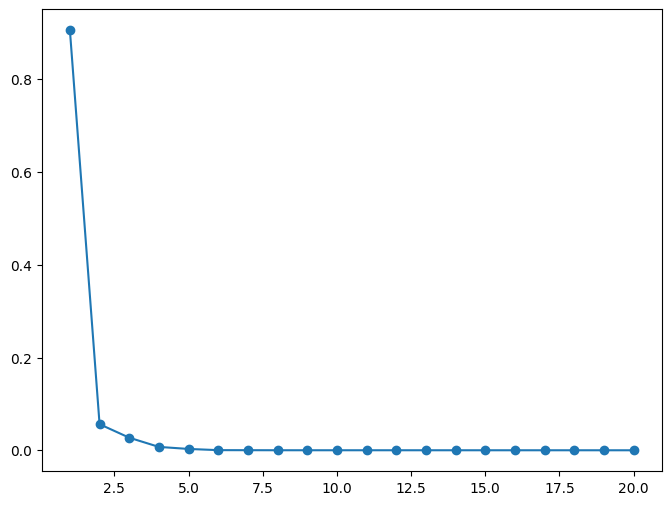

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')